In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D  

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [4]:
print(data.describe(),'\n\n')
print(data.dtypes)

              Open         High          Low         Last        Close  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mean    168.954858   171.429069   166.402308   168.736356   168.731053   
std      51.499145    52.436761    50.542919    51.587384    51.544928   
min     103.000000   104.600000   100.000000   102.600000   102.650000   
25%     137.550000   138.925000   135.250000   137.175000   137.225000   
50%     151.500000   153.250000   149.500000   151.200000   151.100000   
75%     169.000000   172.325000   166.700000   169.100000   169.500000   
max     327.700000   328.750000   321.650000   325.950000   325.750000   

       Total Trade Quantity  Turnover (Lacs)  
count          1.235000e+03      1235.000000  
mean           2.604151e+06      4843.166502  
std            2.277028e+06      5348.919832  
min            1.001800e+05       128.040000  
25%            1.284482e+06      1801.035000  
50%            1.964885e+06      3068.510000  
75% 

In [5]:
close = data['Close']
data = data.drop(['Close'],axis=1)
data['Close'] = close
print(data.head())

     Open    High     Low    Last  Total Trade Quantity  Turnover (Lacs)  \
0  208.00  222.25  206.85  216.00               4642146         10062.83   
1  217.00  218.60  205.90  210.25               3519515          7407.06   
2  223.50  227.80  216.15  217.25               1728786          3815.79   
3  230.00  237.50  225.75  226.45               1708590          3960.27   
4  234.55  234.60  221.05  230.30               1534749          3486.05   

    Close  
0  215.15  
1  209.20  
2  218.20  
3  227.60  
4  230.90  


In [6]:
data.head()

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),Close
0,208.00,222.25,206.85,216.00,4642146,10062.83,215.15
1,217.00,218.60,205.90,210.25,3519515,7407.06,209.20
2,223.50,227.80,216.15,217.25,1728786,3815.79,218.20
3,230.00,237.50,225.75,226.45,1708590,3960.27,227.60
4,234.55,234.60,221.05,230.30,1534749,3486.05,230.90


In [7]:
data.rename(columns = {'Total Trade Quantity':'Total','Turnover (Lacs)':'Turnover'},inplace=True)
print(data.head())

     Open    High     Low    Last    Total  Turnover   Close
0  208.00  222.25  206.85  216.00  4642146  10062.83  215.15
1  217.00  218.60  205.90  210.25  3519515   7407.06  209.20
2  223.50  227.80  216.15  217.25  1728786   3815.79  218.20
3  230.00  237.50  225.75  226.45  1708590   3960.27  227.60
4  234.55  234.60  221.05  230.30  1534749   3486.05  230.90


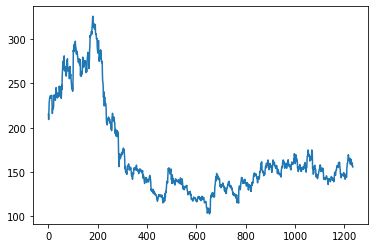

In [8]:
plt.plot(data['Close'])

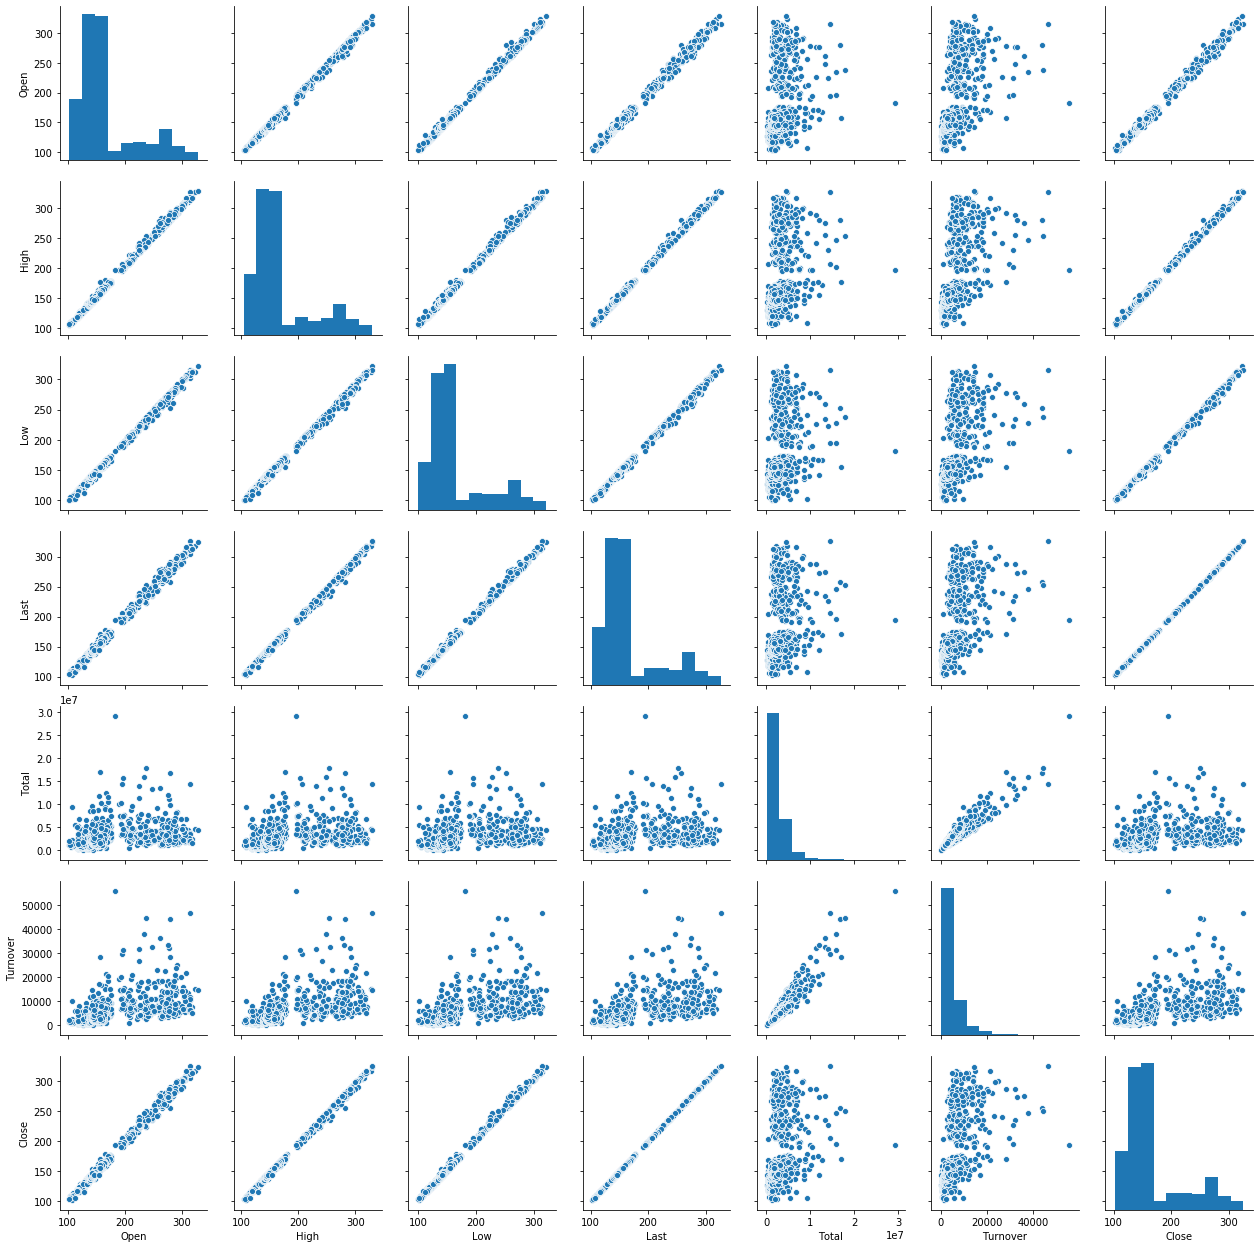

In [9]:
sns.pairplot(data)

In [11]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(-1,1)

In [33]:
score = r2_score(y_pred,y_test)
print(score)

0.9999554993274296


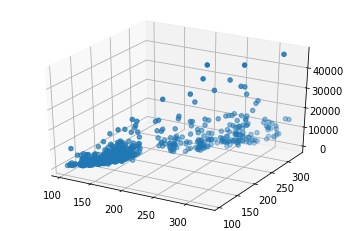

In [58]:
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')

ax1.scatter(X_train[:,0],X_train[:,1],X_train[:,-1])
#ax1.plot_surface(X_train[:,0],X_train[:,1],regressor.predict(X_train),c='r')
plt.show()